In [3]:

import tensorflow as tf

SyntaxError: invalid syntax (3931952322.py, line 1)

In [267]:
import os

In [268]:
import numpy as np 
import seaborn as sns 

In [269]:
directory = '/Users/harshal/Downloads/datta'

In [270]:
data = tf.keras.utils.image_dataset_from_directory(directory,
                                                  labels='inferred',
                                                  label_mode='int',
                                                  color_mode ='rgb',
                                                  batch_size=15,
                                                  image_size=(224,224),
                                                  shuffle=True,
                                                  )

Found 2320 files belonging to 4 classes.


In [271]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [272]:
data = data.map(lambda x,y:(x/255,y))

In [273]:
scaled_iterator = data.as_numpy_iterator()

In [274]:
batch = scaled_iterator.next()

In [275]:
batch[1][:]

array([2, 1, 1, 0, 3, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2], dtype=int32)

In [276]:
import matplotlib.pyplot as plt

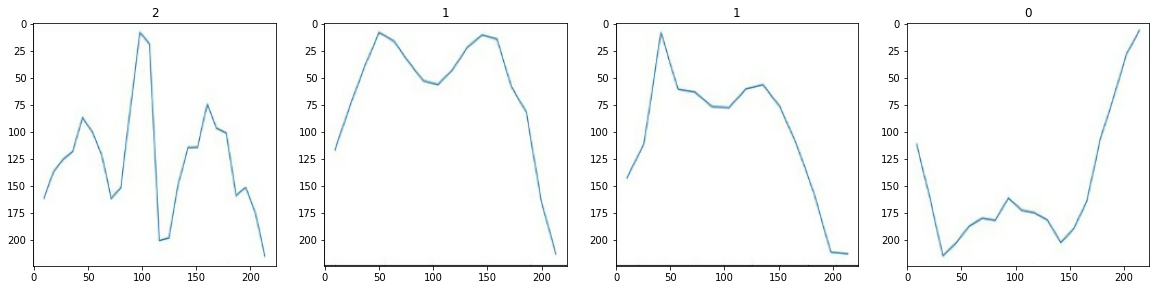

In [277]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))

for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [278]:
cate = ['DB', 'DT', 'HS', 'RHS']

In [279]:
len(data)

155

In [280]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.4)

In [281]:
print(train_size)

93


In [282]:
print(val_size)

62


In [283]:
train= data.take(train_size)
val = data.skip(train_size).take(val_size)

In [284]:
#Importing libraries 

In [285]:
IMG_SHAPE = (224,224) + (3,)
base_model = tf.keras.applications.Xception(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [286]:
base_model.trainable = False

In [287]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

 block4_sepconv1_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 28, 28, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 28, 28, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 14, 14, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 14, 14, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_43 (Add)                   (None, 14, 14, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_42[0][0]']                 
                                                                                                  
 block10_sepconv1_act (Activati  (None, 14, 14, 728)  0          ['add_43[0][0]']                 
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 14, 14, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 14, 14, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 14, 14, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 14, 14, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_46 (A

In [288]:
image_batch, label_batch = next(iter(train))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(15, 7, 7, 2048)


In [289]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(15, 2048)


In [290]:
prediction_layer = tf.keras.layers.Dense(4)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(15, 4)


In [291]:
inputs = tf.keras.Input(shape=(224, 224, 3))

x = (inputs)
x = preprocess_input(x)
x = base_model(x, training=True)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)

outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [292]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [293]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_11 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 tf.math.subtract_11 (TFOpLa  (None, 224, 224, 3)      0         
 mbda)                                                           
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d_6   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                           

In [294]:
history = model.fit(train,
                    epochs=25,
                    validation_data=val)

Epoch 1/25


2023-03-04 13:57:44.736155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


93/93 [==============================] - ETA: 0s - loss: 1.3505 - accuracy: 0.3297

2023-03-04 13:57:55.148125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


93/93 [==============================] - 19s 181ms/step - loss: 1.3505 - accuracy: 0.3297 - val_loss: 1.3360 - val_accuracy: 0.5903
Epoch 2/25
93/93 [==============================] - 16s 170ms/step - loss: 1.3146 - accuracy: 0.4423 - val_loss: 1.2981 - val_accuracy: 0.5568
Epoch 3/25
93/93 [==============================] - 16s 170ms/step - loss: 1.2774 - accuracy: 0.5455 - val_loss: 1.2716 - val_accuracy: 0.5708
Epoch 4/25
93/93 [==============================] - 16s 169ms/step - loss: 1.2509 - accuracy: 0.5491 - val_loss: 1.2390 - val_accuracy: 0.5968
Epoch 5/25
93/93 [==============================] - 16s 170ms/step - loss: 1.2244 - accuracy: 0.5677 - val_loss: 1.2143 - val_accuracy: 0.6108
Epoch 6/25
93/93 [==============================] - 16s 170ms/step - loss: 1.1951 - accuracy: 0.5864 - val_loss: 1.1910 - val_accuracy: 0.6368
Epoch 7/25
93/93 [==============================] - 16s 170ms/step - loss: 1.1678 - accuracy: 0.6057 - val_loss: 1.1633 - val_accuracy: 0.6886
Epoch 8/25

In [373]:
img_dir = '/Users/harshal/Downloads/ChartPatterns/ttt.jpeg'

In [374]:
import cv2
test_im = cv2.imread(img_dir)

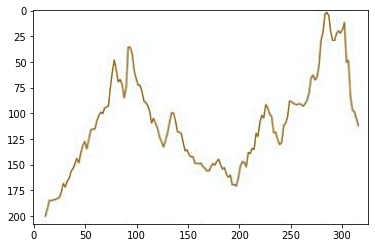

In [375]:
plt.imshow(test_im)

In [376]:
test_im = cv2.resize(test_im, (224,224))

In [377]:
test_im = test_im/255

In [378]:
test_im = test_im.reshape(1,224,224,3)

In [379]:
test_im.shape

(1, 224, 224, 3)

In [380]:
y = model.predict(test_im)

1/1 [==============================] - 0s 31ms/step


In [381]:
z = np.argmax(y[0])
z

2

In [382]:
y[0]

array([-5.3136725, -3.1002908, -2.7617867, -3.6725266], dtype=float32)

In [363]:
# predictions = model.predict(test_im).flatten()
# predictions = tf.nn.softmax(predictions)
# class_id = tf.argmax(predictions).numpy()
# class_score = predictions[class_id].numpy() * 100

# # show result
# # resize_and_show(image, desired_width=640)
# print(f"\n\n{class_name_map[class_id]} (conf = {int(class_score)}%)")

In [364]:
print(cate[z])

HS


In [307]:
base_model.trainable = True

In [308]:

print("Number of layers in the base model: ", len(base_model.layers))

fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

Number of layers in the base model:  132


In [309]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [310]:
model.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_11 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 tf.math.subtract_11 (TFOpLa  (None, 224, 224, 3)      0         
 mbda)                                                           
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d_6   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                           

In [312]:
history_fine = model.fit(train,
                         epochs=10,
                         validation_data=val)

Epoch 1/10


2023-03-04 14:05:22.965234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


93/93 [==============================] - ETA: 0s - loss: 0.8921 - accuracy: 0.8057

2023-03-04 14:05:41.235345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


93/93 [==============================] - 28s 244ms/step - loss: 0.8921 - accuracy: 0.8057 - val_loss: 0.3225 - val_accuracy: 0.9081
Epoch 2/10
93/93 [==============================] - 20s 219ms/step - loss: 0.1034 - accuracy: 0.9613 - val_loss: 0.0481 - val_accuracy: 0.9816
Epoch 3/10
93/93 [==============================] - 20s 220ms/step - loss: 0.0376 - accuracy: 0.9878 - val_loss: 0.0163 - val_accuracy: 0.9946
Epoch 4/10
93/93 [==============================] - 20s 219ms/step - loss: 0.0272 - accuracy: 0.9885 - val_loss: 0.0066 - val_accuracy: 0.9989
Epoch 5/10
93/93 [==============================] - 20s 219ms/step - loss: 0.0171 - accuracy: 0.9943 - val_loss: 0.0213 - val_accuracy: 0.9978
Epoch 6/10
93/93 [==============================] - 20s 219ms/step - loss: 0.0240 - accuracy: 0.9921 - val_loss: 0.0847 - val_accuracy: 0.9654
Epoch 7/10
93/93 [==============================] - 20s 219ms/step - loss: 0.0279 - accuracy: 0.9928 - val_loss: 0.0213 - val_accuracy: 0.9957
Epoch 8/10

In [365]:
j = model.predict(test_im)

1/1 [==============================] - 0s 27ms/step


In [366]:
j

array([[-5.365696 , -3.3289046, -2.767804 , -3.4199917]], dtype=float32)

In [369]:
cate[np.argmax(j)]

'HS'

In [368]:
model.save(os.path.join('/Users/harshal/Desktop'))

INFO:tensorflow:Assets written to: /Users/harshal/Desktop/assets


INFO:tensorflow:Assets written to: /Users/harshal/Desktop/assets
